# Stock prediction using Multiple Linear Regression

In [1]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
# importing the required module to build the model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#importing the dataset
stocks=pd.read_csv("Stock_Price_data_set.csv")

In [3]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [5]:
stocks.shape

(1009, 7)

In [6]:
stocks.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [7]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [8]:
#checking for null values
stocks.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

since there are no null values we can proceed to the next step:

# To make predictions calculating the Percentage Change %


In stock trading, the percentage change is a metric that uses simple arithmetic to find what the relative change in a stock price is over a specific period of time.


The formula for percentage change is:


# (New Price - Old Price) / Old Price x 100. 

The percentage change will be positive if the stock price has gone up and negative if the stock price has gone down. 

in this model we will use it to observe the changes in the price for the day, for both the:

1) High and Low prices
2) Opening and Closing prices 

# Conducting EDA 

In [9]:
#Make two new columns with the percentage change that will be used for making predictions.
stocks["HL_Perc"] = (stocks["High"]-stocks["Low"]) / stocks["Low"] * 100
stocks["CO_Perc"] = (stocks["Close"] - stocks["Open"]) / stocks["Open"] * 100

In [10]:
#converting dates 
dates = np.array(stocks["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [11]:
stocks = stocks[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

In [12]:
#Defining the column labels
stocks["PriceNextMonth"] = stocks["Adj Close"].shift(-30)

In [13]:
stocks.head()

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
0,7.147140,-2.954200,254.259995,11896100,317.500000
1,8.857148,7.274931,265.720001,12595800,316.480011
2,3.071927,-0.757742,264.559998,8981500,306.700012
3,7.047998,-6.357639,250.100006,9306700,300.940002
4,8.339334,-1.725430,249.470001,16906900,320.350006


In [14]:
#Make fetaure and label arrays
X = np.array(stocks.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stocks.dropna(inplace = True)
y = np.array(stocks["PriceNextMonth"])

In [15]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [16]:
# Instantiating the algorithm for building the model
model = LinearRegression()

# building the model using fit() method
model.fit(X_train, y_train)

#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.7464817188091168


In [17]:
#Fit the model again using the whole data set
model.fit(X,y)

LinearRegression()

In [18]:
predictions = model.predict(X_Check)

In [19]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stocks["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the resulting final DataFrame for our model

In [20]:
# score() method for regression model, returns the 'coefficient of determination' (r^2) value for the model
print(model.score(X,y))

0.8022527915682064


In [21]:
# score() method for regression model, returns the 'coefficient of determination' (r^2) value for the model
print(model.score(X,y))

0.8022527915682064


# Visualising our results

Text(0, 0.5, 'Price')

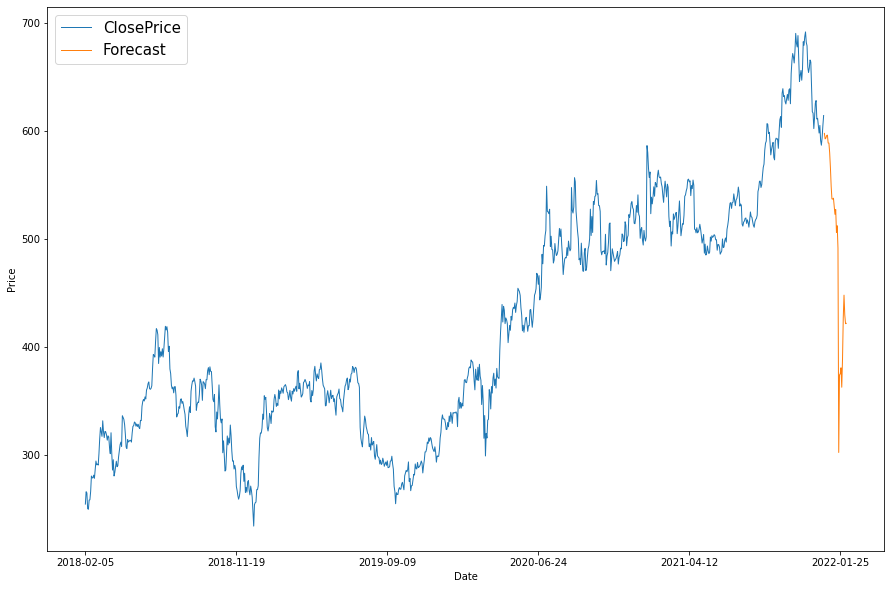

In [22]:
#Plot the final results
result.plot(figsize=(15,10), linewidth=1.0)
plt.legend(loc=2, prop={'size':15})
plt.xlabel('Date')
plt.ylabel('Price')